In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
businesses = pd.read_json('yelp_business.json',lines=True)
reviews = pd.read_json('yelp_review.json',lines=True)
users = pd.read_json('yelp_user.json',lines=True)
checkins = pd.read_json('yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_tip.json',lines=True)
photos = pd.read_json('yelp_photo.json',lines=True)

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [4]:
print(len(businesses))
print(reviews.columns)

188593
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')


In [5]:
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

In [6]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))

188593


In [13]:
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

In [14]:
print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_cool_votes', 'number_funny_votes', 'number_useful_votes',
       'average_days_on_yelp', 'average_number_fans', 'average_number_friends',
       'average_number_years_elite', 'average_review_count', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


In [15]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)

In [16]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

In [17]:
df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

In [18]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

In [20]:
# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()

<Figure size 640x480 with 1 Axes>

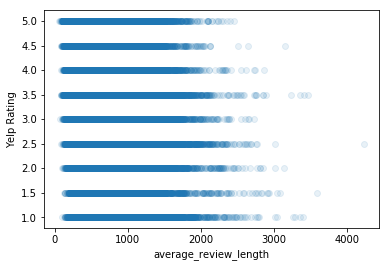

In [21]:
# plot average_review_length against stars here
plt.scatter(df['average_review_length'],df['stars'],alpha=0.1)
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()

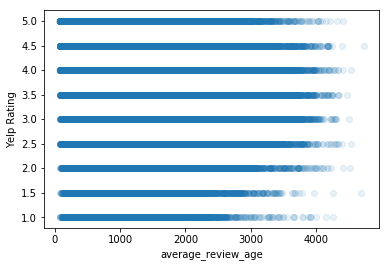

In [22]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'],df['stars'],alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()

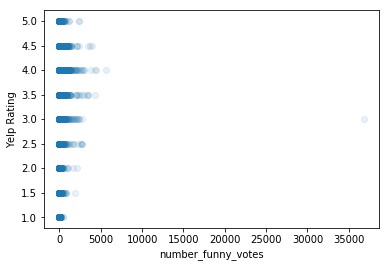

In [23]:
# plot number_funny_votes against stars here
plt.scatter(df['number_funny_votes'],df['stars'],alpha=0.1)
plt.xlabel('number_funny_votes')
plt.ylabel('Yelp Rating')
plt.show()

In [24]:
features = df[['average_review_length','average_review_age']]
ratings = df['stars']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
model.score(X_train,y_train)

0.08250309566544889

In [29]:
model.score(X_test,y_test)

0.08083081210060561

In [30]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074524),
 ('average_review_age', -0.00011621626836366473)]

In [31]:
y_predicted = model.predict(X_test)

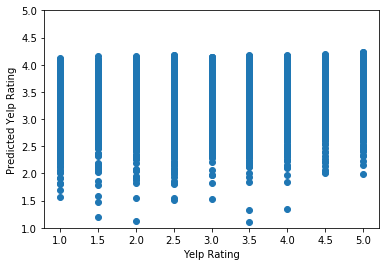

In [32]:
plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

In [33]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [34]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [35]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [36]:
# all features
all_features = binary_features + numeric_features

In [ ]:
# add your own feature subset here
feature_subset = 

In [37]:
# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)
    
    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749612)]


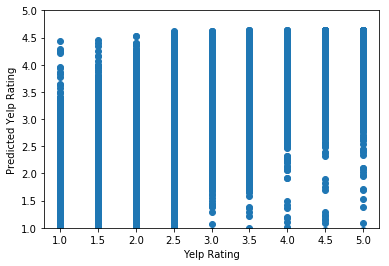

In [38]:
# create a model on sentiment here
model_these_features(sentiment)

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208038988), ('alcohol?', -0.14549670708138188), ('has_wifi', -0.1318739757776259), ('good_for_kids', -0.08632485990337416), ('takes_credit_cards', 0.071755364921953), ('take_reservations', 0.04526558530451624)]


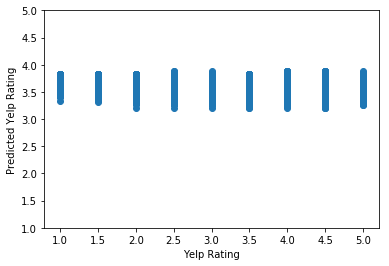

In [39]:
# create a model on all binary features here
model_these_features(binary_features)

Train Score: 0.6734992593766658
Test Score: 0.671331879812014
[('average_review_sentiment', 2.2721076642097016), ('price_range', -0.08046080962699616), ('average_number_years_elite', -0.07190366288054208), ('average_caption_length', -0.003347066007784957), ('number_pics', -0.00295650281289227), ('number_tips', -0.0015953050789025923), ('number_cool_votes', 0.0011468839227083013), ('average_number_fans', 0.0010510602097420108), ('average_review_length', -0.0005813655692093316), ('average_tip_length', -0.0005322032063458492), ('number_useful_votes', -0.00023203784758684865), ('average_review_count', -0.0002243170289504519), ('average_review_age', -0.00016930608165092445), ('average_days_on_yelp', 0.00012878025876722203), ('weekday_checkins', 5.9185807544599255e-05), ('weekend_checkins', -5.518176206975765e-05), ('average_number_friends', 4.826992111615165e-05), ('review_count', -3.483483763846468e-05), ('number_funny_votes', -7.884395674527804e-06)]


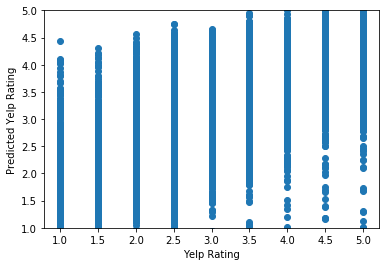

In [40]:
# create a model on all numeric features here
model_these_features(numeric_features)

Train Score: 0.6807828861895333
Test Score: 0.6782129045869246
[('average_review_sentiment', 2.2808456996623665), ('alcohol?', -0.14991498593470548), ('has_wifi', -0.1215538262926246), ('good_for_kids', -0.11807814422012669), ('price_range', -0.06486730150042035), ('average_number_years_elite', -0.06278939713895351), ('has_bike_parking', 0.02729696991228556), ('takes_credit_cards', 0.024451837853633578), ('take_reservations', 0.01413455917297467), ('number_pics', -0.0013133612300808058), ('average_number_fans', 0.0010267986822656092), ('number_cool_votes', 0.0009723722734405862), ('number_tips', -0.0008546563320874887), ('average_caption_length', -0.0006472749798197418), ('average_review_length', -0.000589625792027261), ('average_tip_length', -0.0004205217503403181), ('number_useful_votes', -0.00027150641256134763), ('average_review_count', -0.00023398356902511536), ('average_review_age', -0.00015776544111324202), ('average_days_on_yelp', 0.00012326147662882923), ('review_count', 0.000

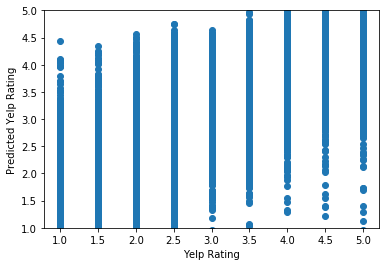

In [41]:
# create a model on all features here
model_these_features(all_features)

In [ ]:
# create a model on your feature subset here
model_these_features(feature_subset)

In [42]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


In [43]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


In [45]:
# these are example values. You can use any set of values for your restaurant!
danielles_delicious_delicacies = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [46]:
model.predict(danielles_delicious_delicacies)

array([4.03799004])